This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Features:
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal : 0 = normal; 1 = fixed defect; 2 = reversable defect
Target : 0=absent 1=present 
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns


In [48]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


DATA DESCRIPTION 

In [34]:
print(data.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
data.shape

(1025, 14)

In [38]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


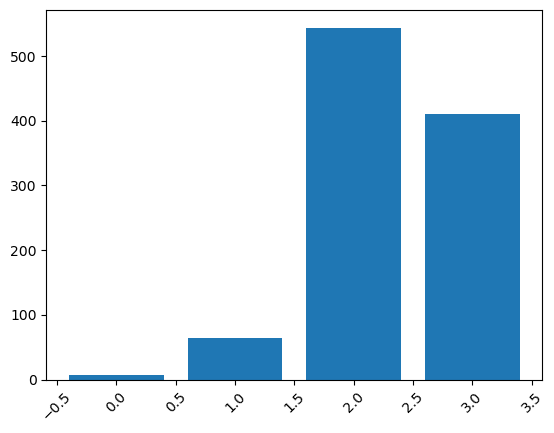

In [39]:
data_occurences = data.groupby("thal").size().reset_index().sort_values(by=0, ascending=False)
data_occ_df = pd.DataFrame(data_occurences)
plt.bar(data_occurences["thal"], data_occurences[0])
plt.xticks(rotation=45)
plt.show()

In [40]:
# Find unique values for each column
len_unique = {}
for col in data.columns:
    len_unique[col]=len(data[col].unique())
len_unique

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4,
 'target': 2}

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

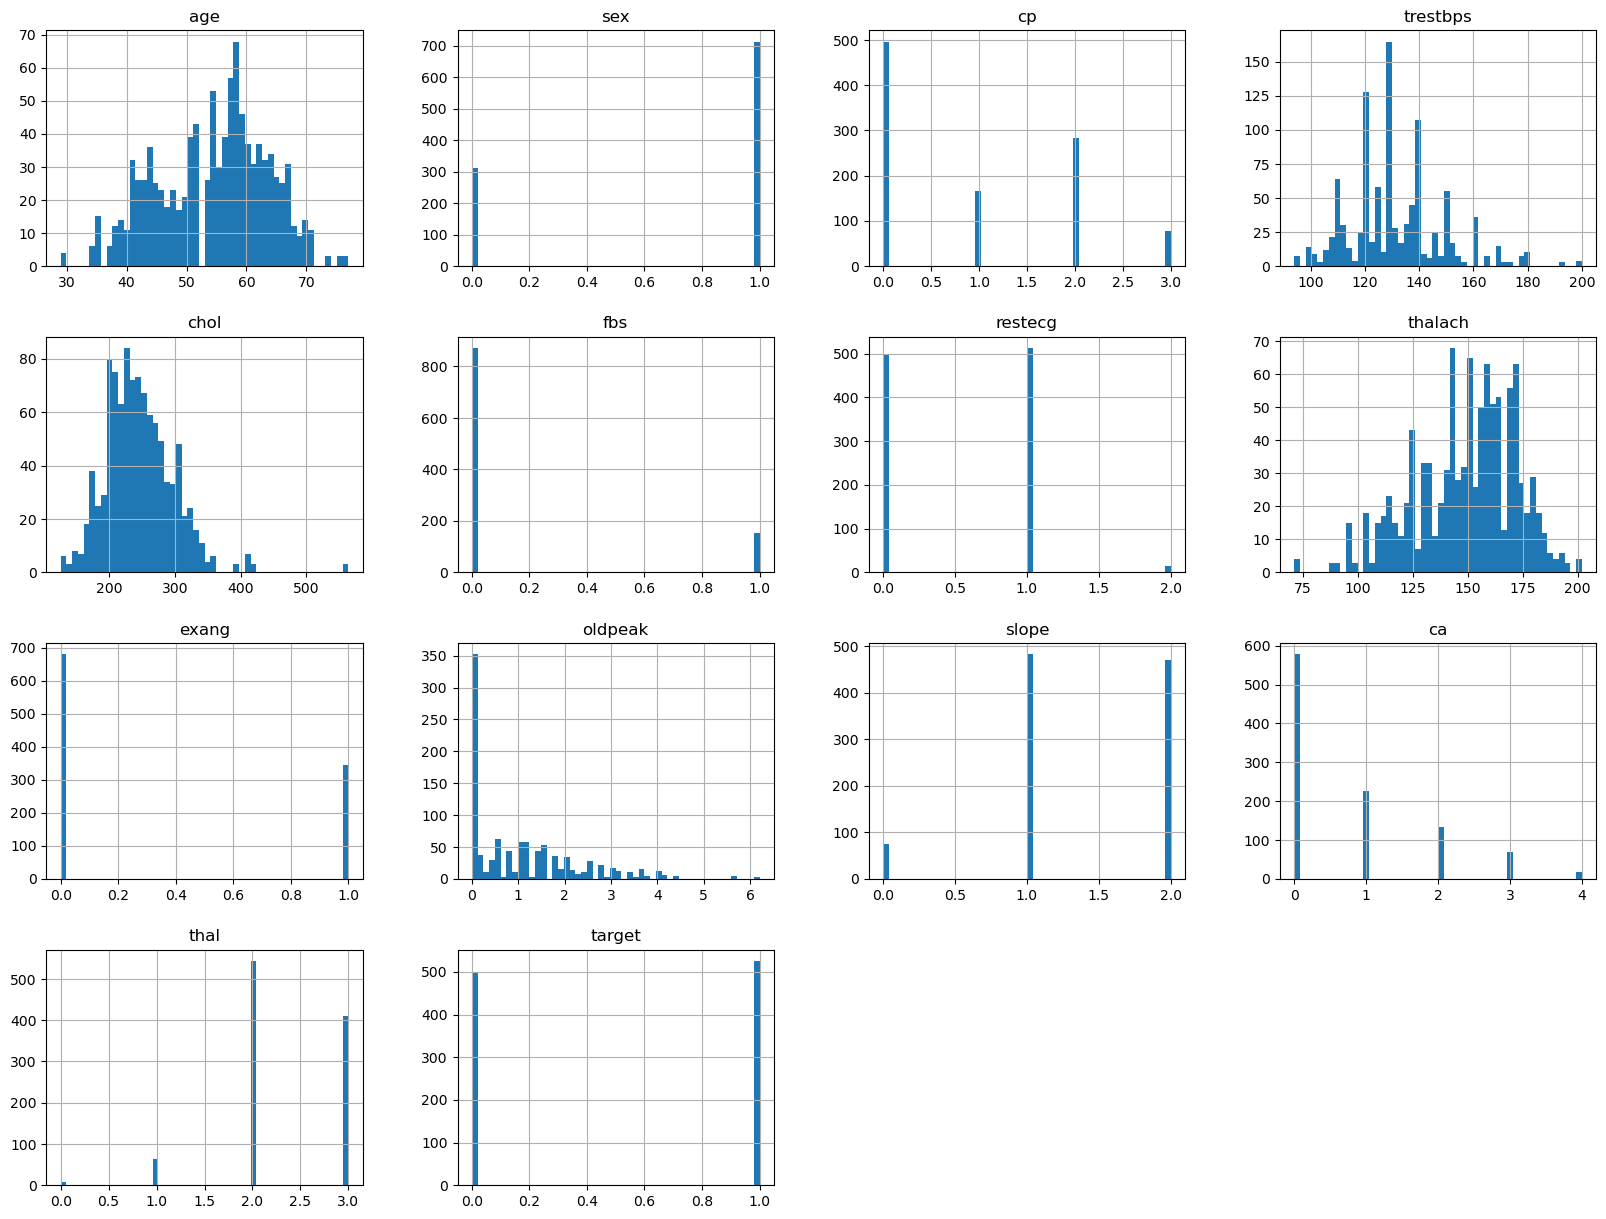

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

In [42]:
# Correlation between feature before the split
correlation_matrix_before_split = data.corr()
print("Correlation Matrix Before Splitting:\n", correlation_matrix_before_split)

Correlation Matrix Before Splitting:
                age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.1984

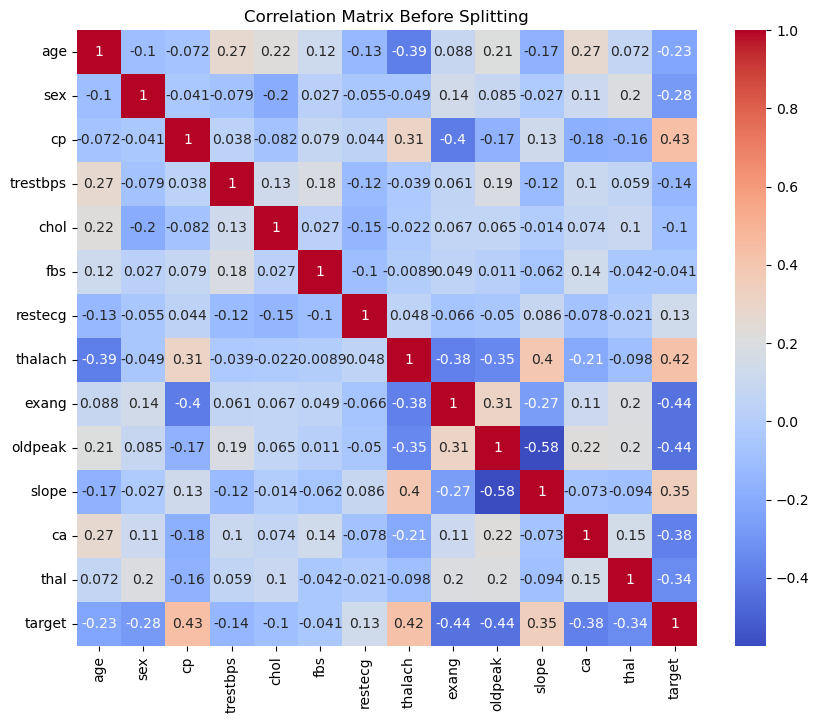

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_before_split, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Before Splitting')
plt.show()

Correlation Explanation 

Key Correlations with the target (Heart Disease)
1. cp (Chest Pain Type) → target: 0.43
    * Moderate Positive Correlation: Certain chest pain types are positively associated with the likelihood of heart disease.
    * Chest pain is a significant indicator in diagnosing heart conditions.
2. thalach (Max Heart Rate) → target: 0.42
    * Moderate Positive Correlation: Higher maximum heart rate during exercise is linked with a higher chance of heart disease.
3. exang (Exercise-Induced Angina) → target: -0.44
    * Moderate Negative Correlation: People who experience exercise-induced chest pain (angina) are less likely to have heart disease.
    * This could seem counterintuitive and may suggest data imbalance or specific patterns in the dataset.
4. oldpeak (ST Depression) → target: -0.44
    * Moderate Negative Correlation: Greater ST depression during exercise is associated with a lower risk of heart disease in this dataset.
    * This might warrant further investigation as it's contrary to typical clinical expectations.
5. slope (Slope of ST Segment) → target: 0.35
    * Moderate Positive Correlation: A steeper slope in ST segment during peak exercise may be associated with heart disease.
6. ca (Number of Major Vessels) → target: -0.38
    * Moderate Negative Correlation: More blocked vessels are linked to a lower risk of heart disease in this dataset, which is unusual and could indicate feature misinterpretation.
7. thal (Thalassemia) → target: -0.34
    * Moderate Negative Correlation: Certain thalassemia results are negatively associated with heart disease.
8. sex → target: -0.28
    * Weak Negative Correlation: Males (likely encoded as 1) are slightly less likely to have heart disease in this dataset.
9. age → target: -0.23
    * Weak Negative Correlation: Older individuals have a slightly lower risk in this dataset, which seems unexpected and may need further exploration.

    Notable Feature-to-Feature Correlations
1. cp → thalach: 0.31
    * People with certain chest pain types tend to have higher heart rates during exercise.
2. exang → thalach: -0.38
    * Those with exercise-induced angina tend to have lower max heart rates.
3. oldpeak → slope: -0.58
    * Strong negative correlation suggests that as ST depression increases, the slope decreases.
4. cp → exang: -0.40
    * Certain chest pain types are less likely to occur with exercise-induced angina.



In [44]:
sex_counts = data['sex'].value_counts(normalize=True) * 100
print("Percentage of male: {:.2f}%".format(sex_counts[1]), 
      "| Percentage of female: {:.2f}%".format(sex_counts[0]))


Percentage of male: 69.56% | Percentage of female: 30.44%


In [45]:
#sepearate the features from the target 
y = data['target']
X = data.drop(['target'], axis=1)

In [46]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64